# Results of PUB exps

In this notebook we will show the results of the PUB experiments. We train the models on the some basins and evaluate them on the other basins for test period.

## Prepare data

Firstly, we need to set cross-validation folds. We randomly divide the orginal data into 2 folds.

```Bash
python pub_prepare.py
```

## Train models

Then, we train the models on the training folds.

```Bash
# PUB for MTL
python train4pub.py --exp exppub00 --loss_weight 0.5 0.5 --ctx 0
# PUB for STL-ET
python train4pub.py --exp exppub10 --loss_weight 0 1 --ctx 1 --limit_part 0
# PUB for STL-Q
python train4pub.py --exp exppub20 --loss_weight 1 0 --ctx 0 --limit_part 1
```

## Evaluate models

After training, we can evaluate the models on the test folds.

Read results from the log files.

In [1]:
from matplotlib import pyplot as plt
import os
import sys

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
# Get the parent directory of the notebook directory
project_dir = os.path.dirname(notebook_dir)
# import the module using a relative path
sys.path.append(project_dir)
import definitions
from scripts.mtl_results_utils import concat_mtl_stl_result
from scripts.streamflow_utils import plot_ecdf_func

Please Check your directory:
ROOT_DIR of the repo:  /mnt/sdc/owen/code/HydroMTL
DATA_SOURCE_DIR of the repo:  /mnt/data/owen411/data
RESULT_DIR of the repo:  /mnt/sdc/owen/code/HydroMTL/results


/mnt/data/owen411/program/miniconda3/envs/MTL/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mtl_q_train_exps=["exppub201", "exppub202"]
mtl_q_test_exps=[exp+ str(0) for exp in mtl_q_train_exps]
mtl_q_et_train_exps=["exppub001", "exppub002"]
mtl_q_et_test_exps=[exp+ str(0) for exp in mtl_q_et_train_exps]

In [4]:
cases_exps_legends_together = [
    "MTL_Q",
    "Q",
    "MTL_Q_PUB",
    "Q_PUB",
]
keys_ecdf = ["Bias", "Corr", "NSE", "KGE", "FHV", "FLV"]
x_intervals = [2, 0.1, 0.1, 0.1, 50, 50]
x_lims = [(-10, 10), (0, 1), (0, 1), (0, 1), (-100, 300), (-100, 300)]
key_results_q = concat_mtl_stl_result(
    mtl_q_et_train_exps,
    mtl_q_et_test_exps,
    mtl_q_train_exps,
    mtl_q_test_exps,
    keys_ecdf,
)


/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromt

Plot results

plot CDF


/mnt/sdc/owen/code/HydroMTL/scripts/streamflow_utils.py:380: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


plot CDF
plot CDF
plot CDF
plot CDF
plot CDF


/mnt/data/owen411/program/miniconda3/envs/MTL/lib/python3.10/site-packages/matplotlib/axes/_base.py:2917: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


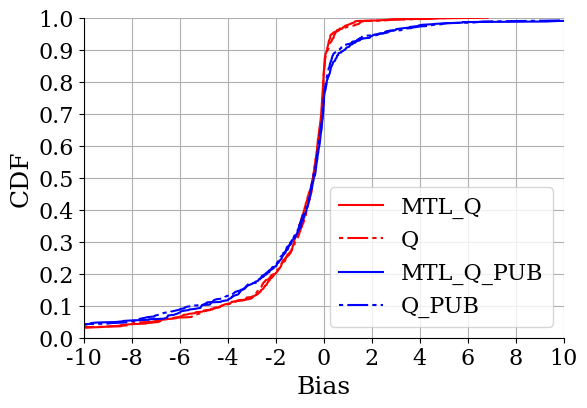

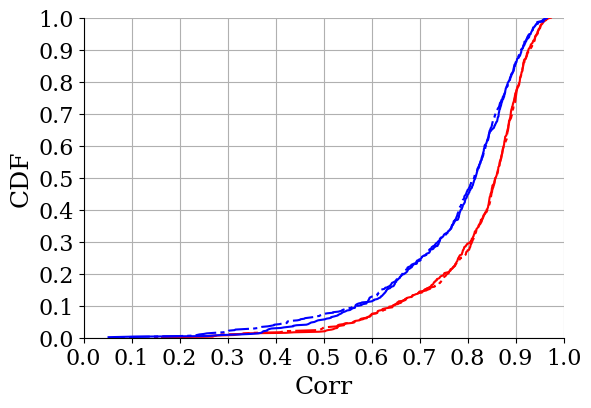

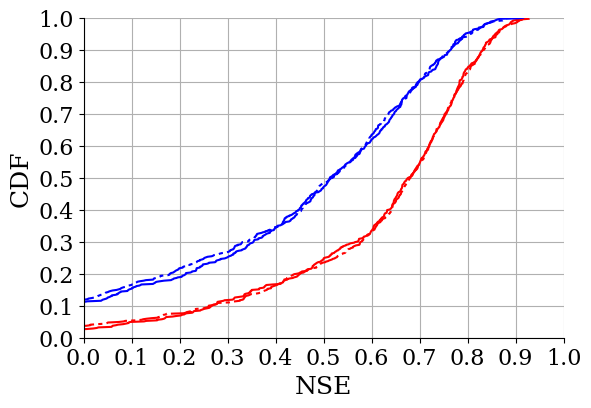

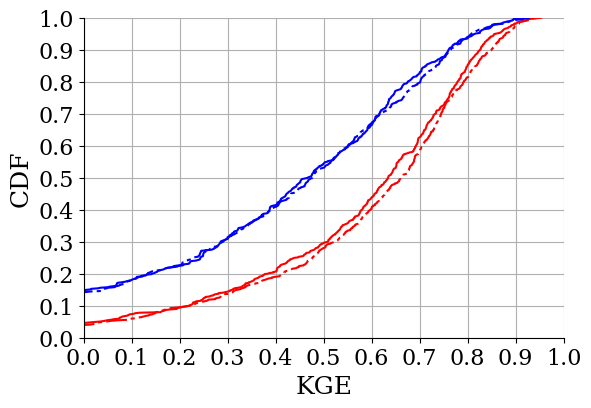

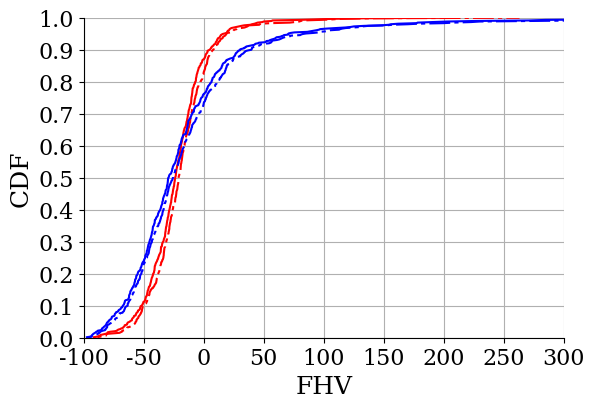

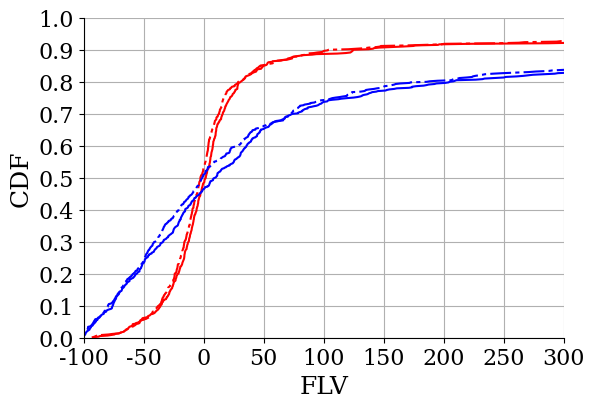

In [5]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
save_fig_path = os.path.join(definitions.RESULT_DIR, "figures")
if not os.path.exists(save_fig_path):
    os.makedirs(save_fig_path)
idx_tmp = 0
for key_tmp in keys_ecdf:
    key_result = key_results_q[idx_tmp]
    plot_ecdf_func(
        key_result,
        cases_exps_legends_together=cases_exps_legends_together,
        save_path=os.path.join(
            save_fig_path,
            f"mtl_pub_q_{key_tmp}_ecdf.png",
        ),
        dash_lines=[False, True, False, True],
        colors="rrbb",
        x_interval=x_intervals[idx_tmp],
        x_lim=x_lims[idx_tmp],
        x_str=key_tmp,
        show_legend=idx_tmp == 0,
    )
    idx_tmp = idx_tmp + 1


In [10]:
mtl_et_train_exps=["exppub101", "exppub102"]
mtl_et_test_exps=[exp+ str(0) for exp in mtl_et_train_exps]

In [11]:
key_results_et = concat_mtl_stl_result(
    mtl_q_et_train_exps,
    mtl_q_et_test_exps,
    mtl_et_train_exps,
    mtl_et_test_exps,
    keys_ecdf,
    var_idx=1,
)

/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromt

plot CDF
plot CDF
plot CDF
plot CDF
plot CDF
plot CDF


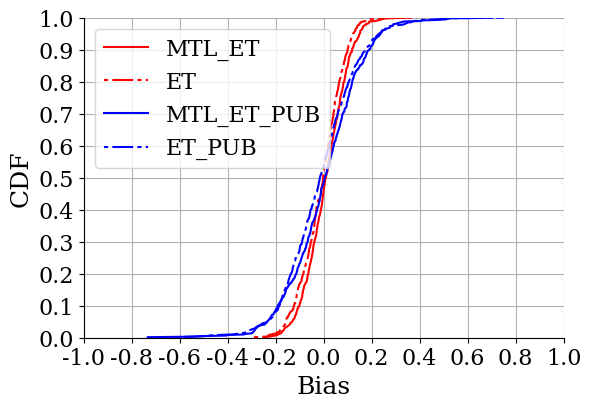

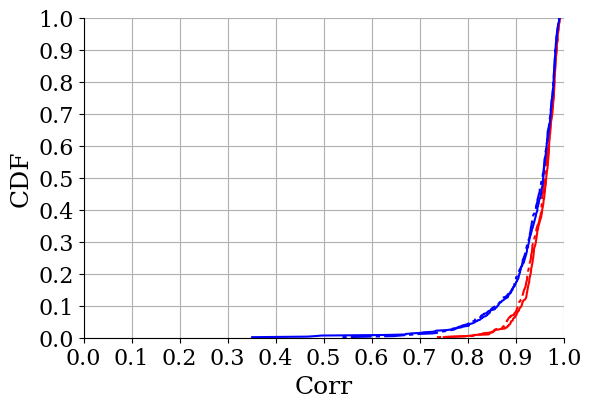

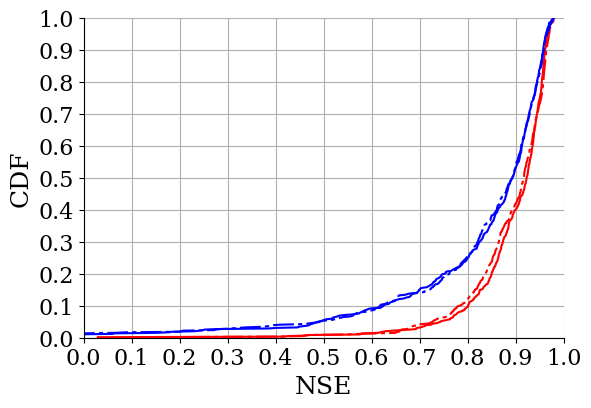

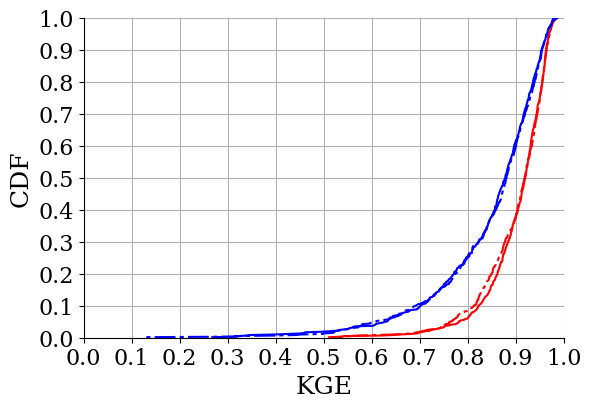

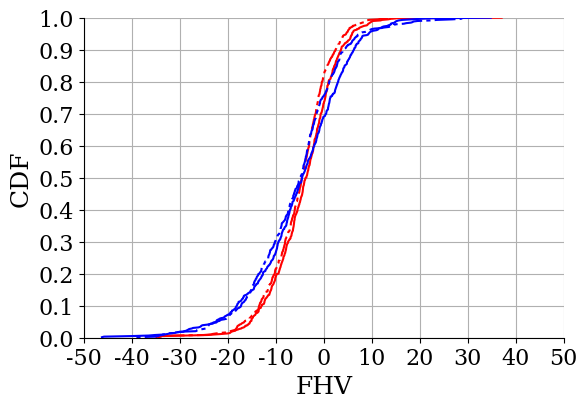

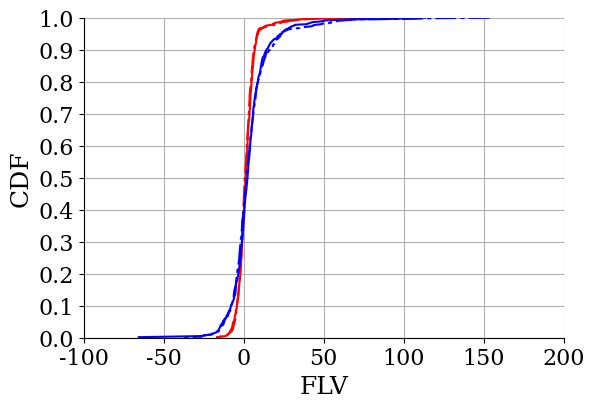

In [14]:
x_intervals = [0.2, 0.1, 0.1, 0.1, 10, 50]
x_lims = [(-1, 1), (0, 1), (0, 1), (0, 1), (-50, 50), (-100, 200)]
idx_tmp = 0
for key_tmp in keys_ecdf:
    key_result = key_results_et[idx_tmp]
    plot_ecdf_func(
        key_result,
        cases_exps_legends_together=[
            "MTL_ET",
            "ET",
            "MTL_ET_PUB",
            "ET_PUB",
        ],
        save_path=os.path.join(
            save_fig_path,
            f"mtl_pub_et_{key_tmp}_ecdf.png",
        ),
        dash_lines=[False, True, False, True],
        colors="rrbb",
        x_interval=x_intervals[idx_tmp],
        x_lim=x_lims[idx_tmp],
        x_str=key_tmp,
        show_legend=idx_tmp == 0,
    )
    idx_tmp = idx_tmp + 1
